In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# AA County COVID-19 Cases By Zip Code (2020-04-11)

In [2]:
aa_county_cases = {  
    "20701" : 0,
    "20711" : 7,
    "20714" : 2,
    "20724" : 29,
    "20733" : 3 ,
    "20736" : 0,
    "20751" : 5,
    "20754" : 0,
    "20755" : 0,
    "20758" : 0,
    "20764" : 5,
    "20765" : 0,
    "20776" : 1,
    "20778" : 0,
    "20779" : 0,
    "21012" : 17,
    "21032" : 6,
    "21035" : 3,
    "21037" : 18,
    "21054" : 18,
    "21060" : 33,
    "21061" : 47,
    "21062" : 0,
    "21076" : 30,
    "21077" : 1,
    "21090" : 7,
    "21108" : 15,
    "21113" : 24,
    "21114" : 20,
    "21122" : 55,
    "21140" : 1,
    "21144" : 29,
    "21146": 19,
    "21225": 11,
    "21226": 3,
    "21240": 0,
    "21401": 41,
    "21402": 2,
    "21403": 24,
    "21405": 2,
    "21409": 14,
    "21411": 0,
    "21412": 0
}

cases = pd.DataFrame(aa_county_cases.items(),columns=['ZIPCODE','Cases'])
cases.set_index('ZIPCODE')
print(cases)

   ZIPCODE  Cases
0    20701      0
1    20711      7
2    20714      2
3    20724     29
4    20733      3
5    20736      0
6    20751      5
7    20754      0
8    20755      0
9    20758      0
10   20764      5
11   20765      0
12   20776      1
13   20778      0
14   20779      0
15   21012     17
16   21032      6
17   21035      3
18   21037     18
19   21054     18
20   21060     33
21   21061     47
22   21062      0
23   21076     30
24   21077      1
25   21090      7
26   21108     15
27   21113     24
28   21114     20
29   21122     55
30   21140      1
31   21144     29
32   21146     19
33   21225     11
34   21226      3
35   21240      0
36   21401     41
37   21402      2
38   21403     24
39   21405      2
40   21409     14
41   21411      0
42   21412      0


Loading 2010 census data by zip code.  Data is broken down by age range and gender:

population,minimum_age,maximum_age,gender,zipcode,geo_id

In [3]:
pop = pd.read_csv('population_by_zip_2010.csv',dtype={'zipcode': str})
pop['ZIPCODE'] = pop['zipcode']
pop.set_index('ZIPCODE')
pop = pop.groupby('ZIPCODE').sum()

Merge case data for Anne Arundel county with population

In [4]:
pop = pop.merge(cases,on='ZIPCODE')
pop

,ZIPCODE,population,minimum_age,maximum_age,Cases
0,20701,6,1910.0,1866.0,0
1,20711,19929,1910.0,1866.0,7
2,20714,13035,1910.0,1866.0,2
3,20724,48279,1910.0,1866.0,29
4,20733,8016,1910.0,1866.0,3
5,20736,26712,1910.0,1866.0,0
6,20751,7029,1910.0,1866.0,5
7,20754,20853,1910.0,1866.0,0
8,20755,27906,1910.0,1866.0,0
9,20758,2163,1910.0,1866.0,0


Read zip codes geo file and merge with population data

In [5]:
zips = gpd.read_file('cb_2018_us_zcta510_500k.shp')
zips['ZIPCODE'] = zips['ZCTA5CE10']
zips.set_index('ZIPCODE')
zips = zips.merge(pop,on='ZIPCODE',how='inner')

# Cases per 10,000

In [10]:
zips['density'] = zips['Cases'] / (zips['population'] / 10_000)
zips['density'] = zips['density'].replace(np.nan,0)
zips.set_index('ZIPCODE')
print(zips[['ZIPCODE','density','Cases','population']].sort_values('density'))

   ZIPCODE    density  Cases  population
0    20779   0.000000      0        3546
24   20758   0.000000      0        2163
23   20755   0.000000      0       27906
13   20736   0.000000      0       26712
7    20778   0.000000      0        6027
6    20765   0.000000      0        1542
19   20754   0.000000      0       20853
4    20701   0.000000      0           6
1    21240   0.000000      0           0
8    21140   0.964227      1       10371
12   20776   1.013479      1        9867
15   21225   1.093059     11      100635
31   21402   1.277874      2       15651
34   21035   1.279591      3       23445
32   21226   1.322576      3       22683
18   20714   1.534331      2       13035
33   21032   2.260398      6       26544
11   21409   2.325890     14       60192
27   21146   2.371591     19       80115
3    21090   2.384846      7       29352
36   21113   2.625619     24       91407
35   21114   2.642881     20       75675
9    21403   2.642968     24       90807
29   21012   2.6

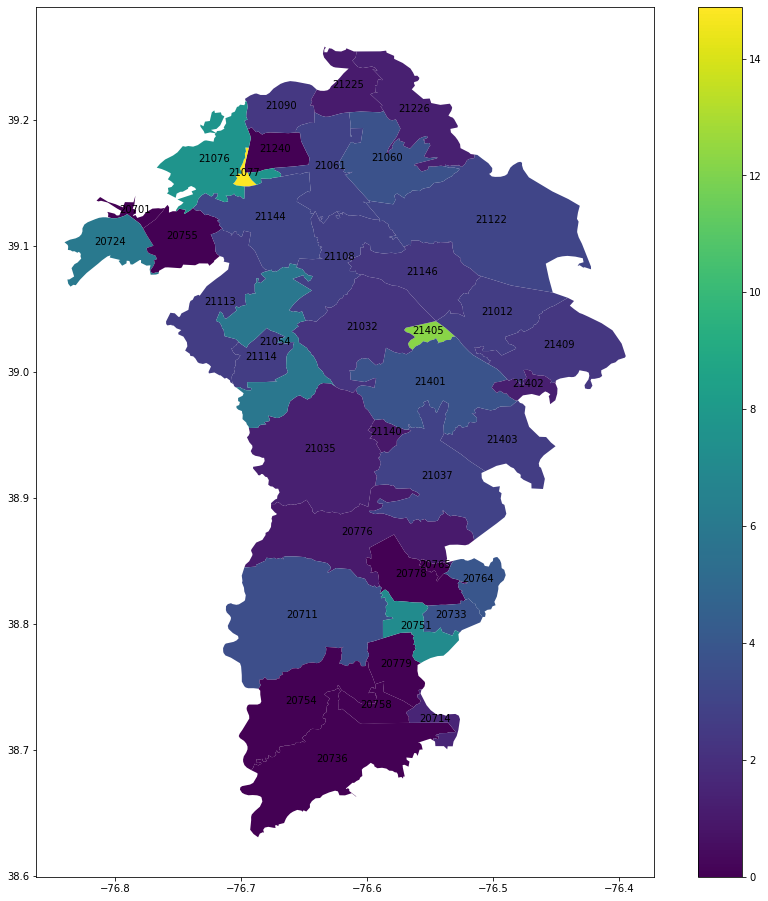

In [11]:
zplot = zips.plot(column='density',figsize=(16,16),legend=True)
_ = zips.apply(lambda x: zplot.annotate(s=x.ZCTA5CE10, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)